# Анализ данных с Pandas

In [1]:
import pandas as pd
import numpy as np

## Структура

In [5]:
q = pd.DataFrame(data={'a': ['abc', 'bcd', 'def'], 'b': [1,2,3], 'c': [100, 300, 200]}, index=[8,9,10])
q

,a,b,c
8,abc,1,100
9,bcd,2,300
10,def,3,200


In [6]:
q.index

Int64Index([8, 9, 10], dtype='int64')

In [8]:
q.columns

Index(['a', 'b', 'c'], dtype='object')

In [9]:
q.a

8     abc
9     bcd
10    def
Name: a, dtype: object

In [10]:
q['a']

8     abc
9     bcd
10    def
Name: a, dtype: object

In [11]:
type(q.a)

pandas.core.series.Series

In [12]:
q[:2]

,a,b,c
8,abc,1,100
9,bcd,2,300


In [13]:
q[ ['a', 'b'] ]

,a,b
8,abc,1
9,bcd,2
10,def,3


In [14]:
q[['a', 'b']][:2]

,a,b
8,abc,1
9,bcd,2


## Чтение и просмотр

Данные соцопросов Census Income, с которыми будем работать:

In [15]:
df = pd.read_csv('../data/CensusIncome/adult.data.csv')

* __age__: continuous. 
* __workclass__: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* __fnlwgt__: continuous. 
* __education__: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* __education-num__: continuous. 
* __marital-status__: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* __occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* __relationship__: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* __sex__: Female, Male. 
* __capital-gain__: continuous. 
* __capital-loss__: continuous. 
* __hours-per-week__: continuous. 
* __native-country__: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

`head()` показывает первые 5 строк датафрейма. 

`tail()` - последние 5.

`head(N)` показывает первые N строк датафрейма. 

`tail(N)` - последние N.

In [16]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Общее

Размер:

In [17]:
df.shape

(32561, 15)

Столбцы:

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

Информация содержит данные о типе колонок, степени их заполненности (в нашем случае пропусков в данных нет), типе данных каждой из колонок, а также потреблении памяти:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Метод `describe` содержит основные статистики по числовым столбцам данных: 
* количество
* среднее
* среднеквадратичное отклонение
* минимум, максимум
* медиану
* первый и третий квартили

In [20]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Если хочется посмотреть и на нечисловые признаки, то нужно указать их тип в параметре `include`. Всего есть совсем немного основных: 
* `bool` - логический
* `object` - общий нечисловой, в большинстве случаев это строки
* `numeric` - числовой, включающий как числа с плавающей запятой, так и целые

In [21]:
df.describe(include=['object', 'bool'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Полезным методом является `value_counts()`, считающим распределение данных по категориям:

In [22]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Для отображения в долях существует флажок `normalize`:

In [23]:
df.education.value_counts(normalize=True)

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

Недостаточно понятно? Построим!

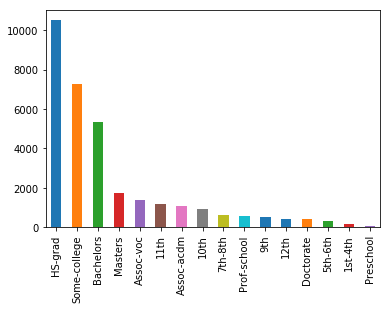

In [24]:
df.education.value_counts().plot.bar(); #(kind='bar');

## Индексация

Весь датафрейм:

In [25]:
df;

Только те, чей возраст меньше 25 лет, но больший 10:

In [26]:
df[(df.age < 25) & (df.age > 10)];

Только те, кто получают больше 50 000$:

In [28]:
df[df.salary == '>50K'];

In [29]:
df[df.salary == '<=50K'].sex.value_counts(normalize=False)

Male      15128
Female     9592
Name: sex, dtype: int64

In [30]:
df[df.salary == '>50K'].sex.value_counts(normalize=True)

Male      0.849637
Female    0.150363
Name: sex, dtype: float64

## Сортировка

In [31]:
df.sort_values(by=['education']);

Отсортируем сначала по полу, внутри пола - по возрасту, но в обратном порядке

In [32]:
df.sort_values(by=['sex', 'age'], ascending=[True, False]);

## Применение функций

Применить функцию к каждому столбцу или каждой строке можно с помощью `apply`:

In [33]:
t = pd.DataFrame(data = {'a': [1,2,3], 'b': [4,5,6]})
t

,a,b
0,1,4
1,2,5
2,3,6


In [34]:
t['c'] = t.apply(lambda row: row['a'] + row['b'], axis=1) # построчно

In [35]:
t

,a,b,c
0,1,4,5
1,2,5,7
2,3,6,9


Применение функции к каждой __ячейке__ реализовывается с помощью `map`:

In [36]:
renaming = {'>50K': 1, '<=50K': 0}
df.salary = df.salary.map(renaming)

In [37]:
df.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [38]:
renaming = {1:'> 50K', 0: '<= 50K'}
df.salary = df.salary.map(renaming)

__apply__ к нескольким столбцам сразу называется __applymap__:

In [39]:
df['sex'] = df['sex'].apply(lambda x: x.lower())
df['relationship'] = df['relationship'].apply(lambda x: x.lower())

In [40]:
# same as above:
cols = ['sex', 'relationship']
df[cols] = df[cols].applymap(lambda x: x.lower())

У строковых столбцов есть хитрое поле __str__, которое возвращает наружу как будто строку (синтаксис тот же), но применяет к каждому элементу столбца.

При больших объемах данных это будет быстрее, потому что `.str` под капотом векторизует операции со строками. Для дат можно использовать `.dt`.

In [46]:
df.sex.apply(lambda x: x.upper());

In [47]:
# same as above
df.sex.str.upper();

## Дубликаты

In [42]:
q = pd.DataFrame(data={'a': [1,2,3,1,1], 'b': [1,2,3,2,1], 'c':[10,20,30,40,40]})
q

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30
3,1,2,40
4,1,1,40


In [43]:
q.duplicated(['a'])

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [44]:
q.duplicated(['a', 'b']) # - уже оценивает кортежи значений из нескольких колонок

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [45]:
q.drop_duplicates(subset=['a'])

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30


In [46]:
q.drop_duplicates(subset=['a', 'b'])

,a,b,c
0,1,1,10
1,2,2,20
2,3,3,30
3,1,2,40


## Группировка

In [47]:
df.groupby(['salary']);

__Важно__: groupby-объекты - не копии частей датафрейма!

In [48]:
df.groupby(['salary']).describe(include=['object', 'bool'])

education                         marital-status         \
           count unique        top  freq          count unique   
salary                                                           
<= 50K     24720     16    HS-grad  8826          24720      7   
> 50K       7841     15  Bachelors  2221           7841      7   

                                  native-country         ...     relationship  \
                       top   freq          count unique  ...              top   
salary                                                   ...                    
<= 50K       Never-married  10192          24720     42  ...    not-in-family   
> 50K   Married-civ-spouse   6692           7841     40  ...          husband   

                sex                     workclass                         
        freq  count unique   top   freq     count unique      top   freq  
salary                                                                    
<= 50K  7449  24720      2  male  15128     24720      9  Private  17733  
> 50K   5918   7841      2  male   6662      7841      7  Private   4963  

[2 rows x 32 columns]

In [49]:
df.groupby('salary')

In [50]:
df.sex.value_counts()

male      21790
female    10771
Name: sex, dtype: int64

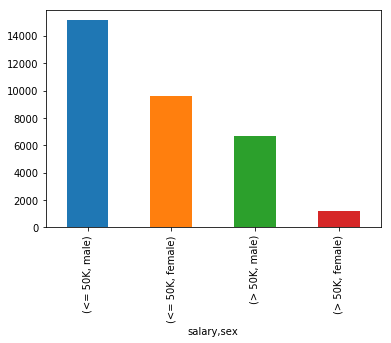

In [51]:
df.groupby('salary').sex.value_counts().plot.bar();

## Таблицы сопряженности и melt

### Таблицы сопряженности

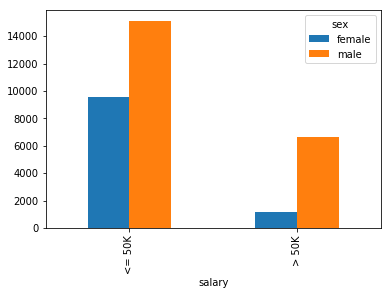

In [52]:
pd.crosstab(df.salary, df.sex).plot(kind='bar');

In [53]:
pd.crosstab(df.salary, df.sex, normalize=True)

sex,female,male
salary,,
<= 50K,0.294586,0.464605
> 50K,0.036209,0.204601


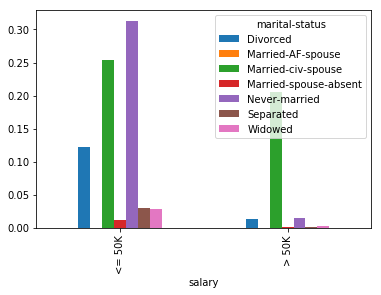

In [54]:
pd.crosstab(df.salary, df['marital-status'], normalize=True).plot.bar();

### Melt - превращение столбцов в строки

In [56]:
t = pd.DataFrame(data={'name': ['PC', 'PlayStation4'], 
                   '1W-2014': [100, 300], 
                   '2W-2014': [150, 350]})
t

,name,1W-2014,2W-2014
0,PC,100,150
1,PlayStation4,300,350


In [57]:
t2 = pd.melt(t, id_vars=['name'], value_name='cost', var_name='timestamp')
t2

,name,timestamp,cost
0,PC,1W-2014,100
1,PlayStation4,1W-2014,300
2,PC,2W-2014,150
3,PlayStation4,2W-2014,350


## Изменение таблиц

In [58]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K


### Добавление нового столбца

In [59]:
df['working_days'] = df['hours-per-week'] / 8.0

In [65]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days,constant,anotherConstant
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.000,1,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K,1.625,1,2


In [61]:
df['constant'] = 1

In [62]:
df = df.assign(anotherConstant = lambda dataframe: dataframe.constant*2)

In [64]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days,constant,anotherConstant
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.000,1,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K,1.625,1,2


### Удаление строк и столбцов

In [66]:
df.drop(['constant', 'anotherConstant'], axis=1, inplace=True)

__NB__: У большинства операторов pandas есть флажок `inplace`. Если он выставлен в `False` (по умолчанию именно так), то изменения, например, как `drop` в примере выше, не будут изменять таблицу, а вернут измененную копию.

In [67]:
df.drop([1,2]).head(3) # => удаляет строки

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,husband,Black,male,0,0,40,United-States,<= 50K,5.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,wife,Black,female,0,0,40,Cuba,<= 50K,5.0


### loc, iloc

In [68]:
df.loc[0, 'workclass'] # получение конкретной ячейки по индексу и названию столбца

'State-gov'

In [69]:
df.iloc[0, 1] # получение конкретной ячейки по номеру строки и номеру столбца, вне зависимости от индексов

'State-gov'

__Важно__: можно и получать строки по маскам:

In [70]:
df.loc[df.age % 5 == 0, 'workclass'].head()

1     Self-emp-not-inc
11           State-gov
14             Private
16    Self-emp-not-inc
20             Private
Name: workclass, dtype: object

__Важно__: Основываясь на этом, можно присваивать другим значениям:

In [71]:
df.loc[df.age % 2 == 0, 'workclass'] = 'ЧЕТНЫЙ'

In [72]:
df.loc[:5, 'education'] = 'NO EDUCATION'

In [75]:
df.head(7)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,working_days
0,39,State-gov,77516,NO EDUCATION,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.000
1,50,ЧЕТНЫЙ,83311,NO EDUCATION,13,Married-civ-spouse,Exec-managerial,husband,White,male,0,0,13,United-States,<= 50K,1.625
2,38,ЧЕТНЫЙ,215646,NO EDUCATION,9,Divorced,Handlers-cleaners,not-in-family,White,male,0,0,40,United-States,<= 50K,5.000
3,53,Private,234721,NO EDUCATION,7,Married-civ-spouse,Handlers-cleaners,husband,Black,male,0,0,40,United-States,<= 50K,5.000
4,28,ЧЕТНЫЙ,338409,NO EDUCATION,13,Married-civ-spouse,Prof-specialty,wife,Black,female,0,0,40,Cuba,<= 50K,5.000
5,37,Private,284582,NO EDUCATION,14,Married-civ-spouse,Exec-managerial,wife,White,female,0,0,40,United-States,<= 50K,5.000
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,not-in-family,Black,female,0,0,16,Jamaica,<= 50K,2.000


### Переименование столбцов

In [76]:
df.columns = [c.upper() for c in df.columns]

In [77]:
df.head(1)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY,WORKING_DAYS
0,39,State-gov,77516,NO EDUCATION,13,Never-married,Adm-clerical,not-in-family,White,male,2174,0,40,United-States,<= 50K,5.0


In [78]:
df.columns = [c.lower() for c in df.columns]

In [79]:
df = df.rename(columns={'marital-status': 'marital_status'})
                        # словарь старое-новое значение

## Работа с пропущенными (NaN) значениями

In [80]:
test = pd.DataFrame(data={'name': ['John', 'Bill', 'Jennifer', 'Max'], 
                          'salary': [90, np.nan, 95, 130], 
                          'age': [27, 30, np.nan, np.nan],
                          'status': [np.nan, 'married', np.nan, 'married']
                         })
test = test[['name', 'age', 'salary', 'status']]
test

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


### Отображение

In [81]:
test[test['age'].isnull()]

,name,age,salary,status
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [82]:
test[test['age'].notnull()]

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married


In [83]:
test[test.isnull().any(axis=1)] # !

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,NaN,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [84]:
test[~test.isnull().any(axis=1)]

,name,age,salary,status


### Заполнение

Прежде всего, можно заполнить некоторым константным значением:

In [85]:
dashtest = test.fillna('-')
dashtest

,name,age,salary,status
0,John,27,90,-
1,Bill,30,-,married
2,Jennifer,-,95,-
3,Max,-,130,married


Важно заметить, что теперь слобцы возраста и зарплаты более не числовые:

In [86]:
print(test.dtypes, '\n\n', dashtest.dtypes)

name       object
age       float64
salary    float64
status     object
dtype: object 

 name      object
age       object
salary    object
status    object
dtype: object


In [87]:
test.fillna(method='ffill')

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,90.0,married
2,Jennifer,30.0,95.0,married
3,Max,30.0,130.0,married


In [88]:
test.fillna(method='bfill')

,name,age,salary,status
0,John,27.0,90.0,married
1,Bill,30.0,95.0,married
2,Jennifer,NaN,95.0,married
3,Max,NaN,130.0,married


In [89]:
test.fillna(method='ffill').fillna(method='bfill')

,name,age,salary,status
0,John,27.0,90.0,married
1,Bill,30.0,90.0,married
2,Jennifer,30.0,95.0,married
3,Max,30.0,130.0,married


In [90]:
test['salary'] = test[['salary']].fillna(test.salary.median())
test

,name,age,salary,status
0,John,27.0,90.0,NaN
1,Bill,30.0,95.0,married
2,Jennifer,NaN,95.0,NaN
3,Max,NaN,130.0,married


In [91]:
test['age'] = test[['salary']].fillna(25)
test['status'] = test[['status']].fillna(test.status.mode()[0])
test

,name,age,salary,status
0,John,90.0,90.0,married
1,Bill,95.0,95.0,married
2,Jennifer,95.0,95.0,married
3,Max,130.0,130.0,married


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Что надо запомнить:</h3> 
    </div>
    <ol>
        <li><b>df.shape</b> - размер
        <li><b>df.head(</b><i>N</i><b>)</b>, <b>df.tail(</b><i>N</i><b>)</b>, - просмотр
        <li><b>df[</b><i>массив имен колонок</i><b>]</b> - часть (slice) датафрейма
        <li><b>df['</b><i>имя колонки</i><b>']</b> - одна колонка (можно и через точку: <b>df.</b><i>имя_колонки</i>)
        <li><b>df.unique</b>, <b>df.nunique</b> - просмотр уникальных значений и их количества
        <li><b>df.value_counts</b> - сколько разных значений в колонке
        <li><b>df.</b><i>имя колонки</i><b>.apply</b> - применяет функцию к значениям в столбце
        <li><b>df.fillna</b> - заполняет NaN
        <li><b>df.dropna</b> - удаляет строки/столбцы с NaN
        <li><b>df.duplicated</b> - показывает строки, являющиеся дупликатами других
        <li><b>df.drop_duplicates</b> - удаляет строки-дупликаты
        <li><b>df[df.isnull().any(axis=1)]</b> - вывести строки, содержащие NaN
        <li><b>df[df.</b><i>имя колонки</i><b>.isnull().any(axis=1)]</b> - вывести только те строки, где в указанной колонке есть пропуски
        <li><b>df.groupby</b> - группировка по некоторому признаку
    </ol>
</div>

## Ссылки
 - Шпаргалка: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
 - Если хочешь стать pandas-ninja: https://github.com/TomAugspurger/effective-pandas